# Titanic Survival Prediction.

### Importing Important Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Downloading DataSets

In [3]:
df = pd.read_csv('titanic.csv')

### Data Structure And Content

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
df.shape

(418, 12)

In [7]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

## Missing Value Detection

In [8]:
df.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

## Missing Value Treatment

In [9]:
imputer = SimpleImputer(strategy='median')  # Impute missing values with median for numeric columns
df['Fare'] = imputer.fit_transform(df[['Fare']])
df['Age'] = imputer.fit_transform(df[['Age']])
df['Embarked'].fillna('S', inplace=True)

In [10]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

## EDA - Exploratory Data Analysis

<Axes: xlabel='Sex', ylabel='count'>

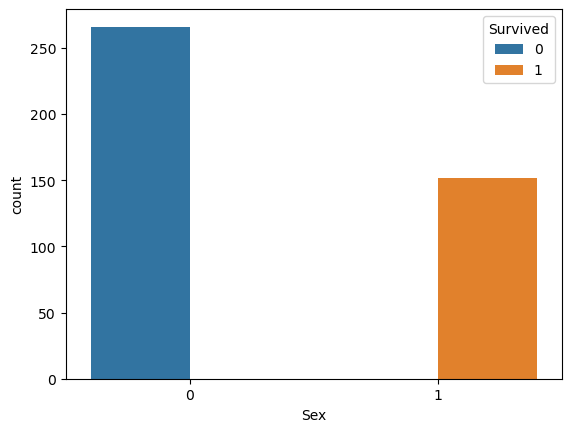

In [35]:
sns.countplot(x=df['Sex'], hue=df["Survived"])

<Axes: xlabel='Survived', ylabel='count'>

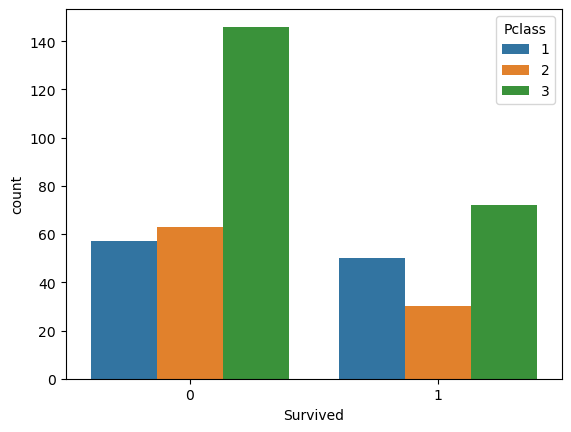

In [36]:
#let's visualize the count of survivals wrt pclass
sns.countplot(x=df['Survived'], hue=df['Pclass'])

In [11]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\vunuk\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


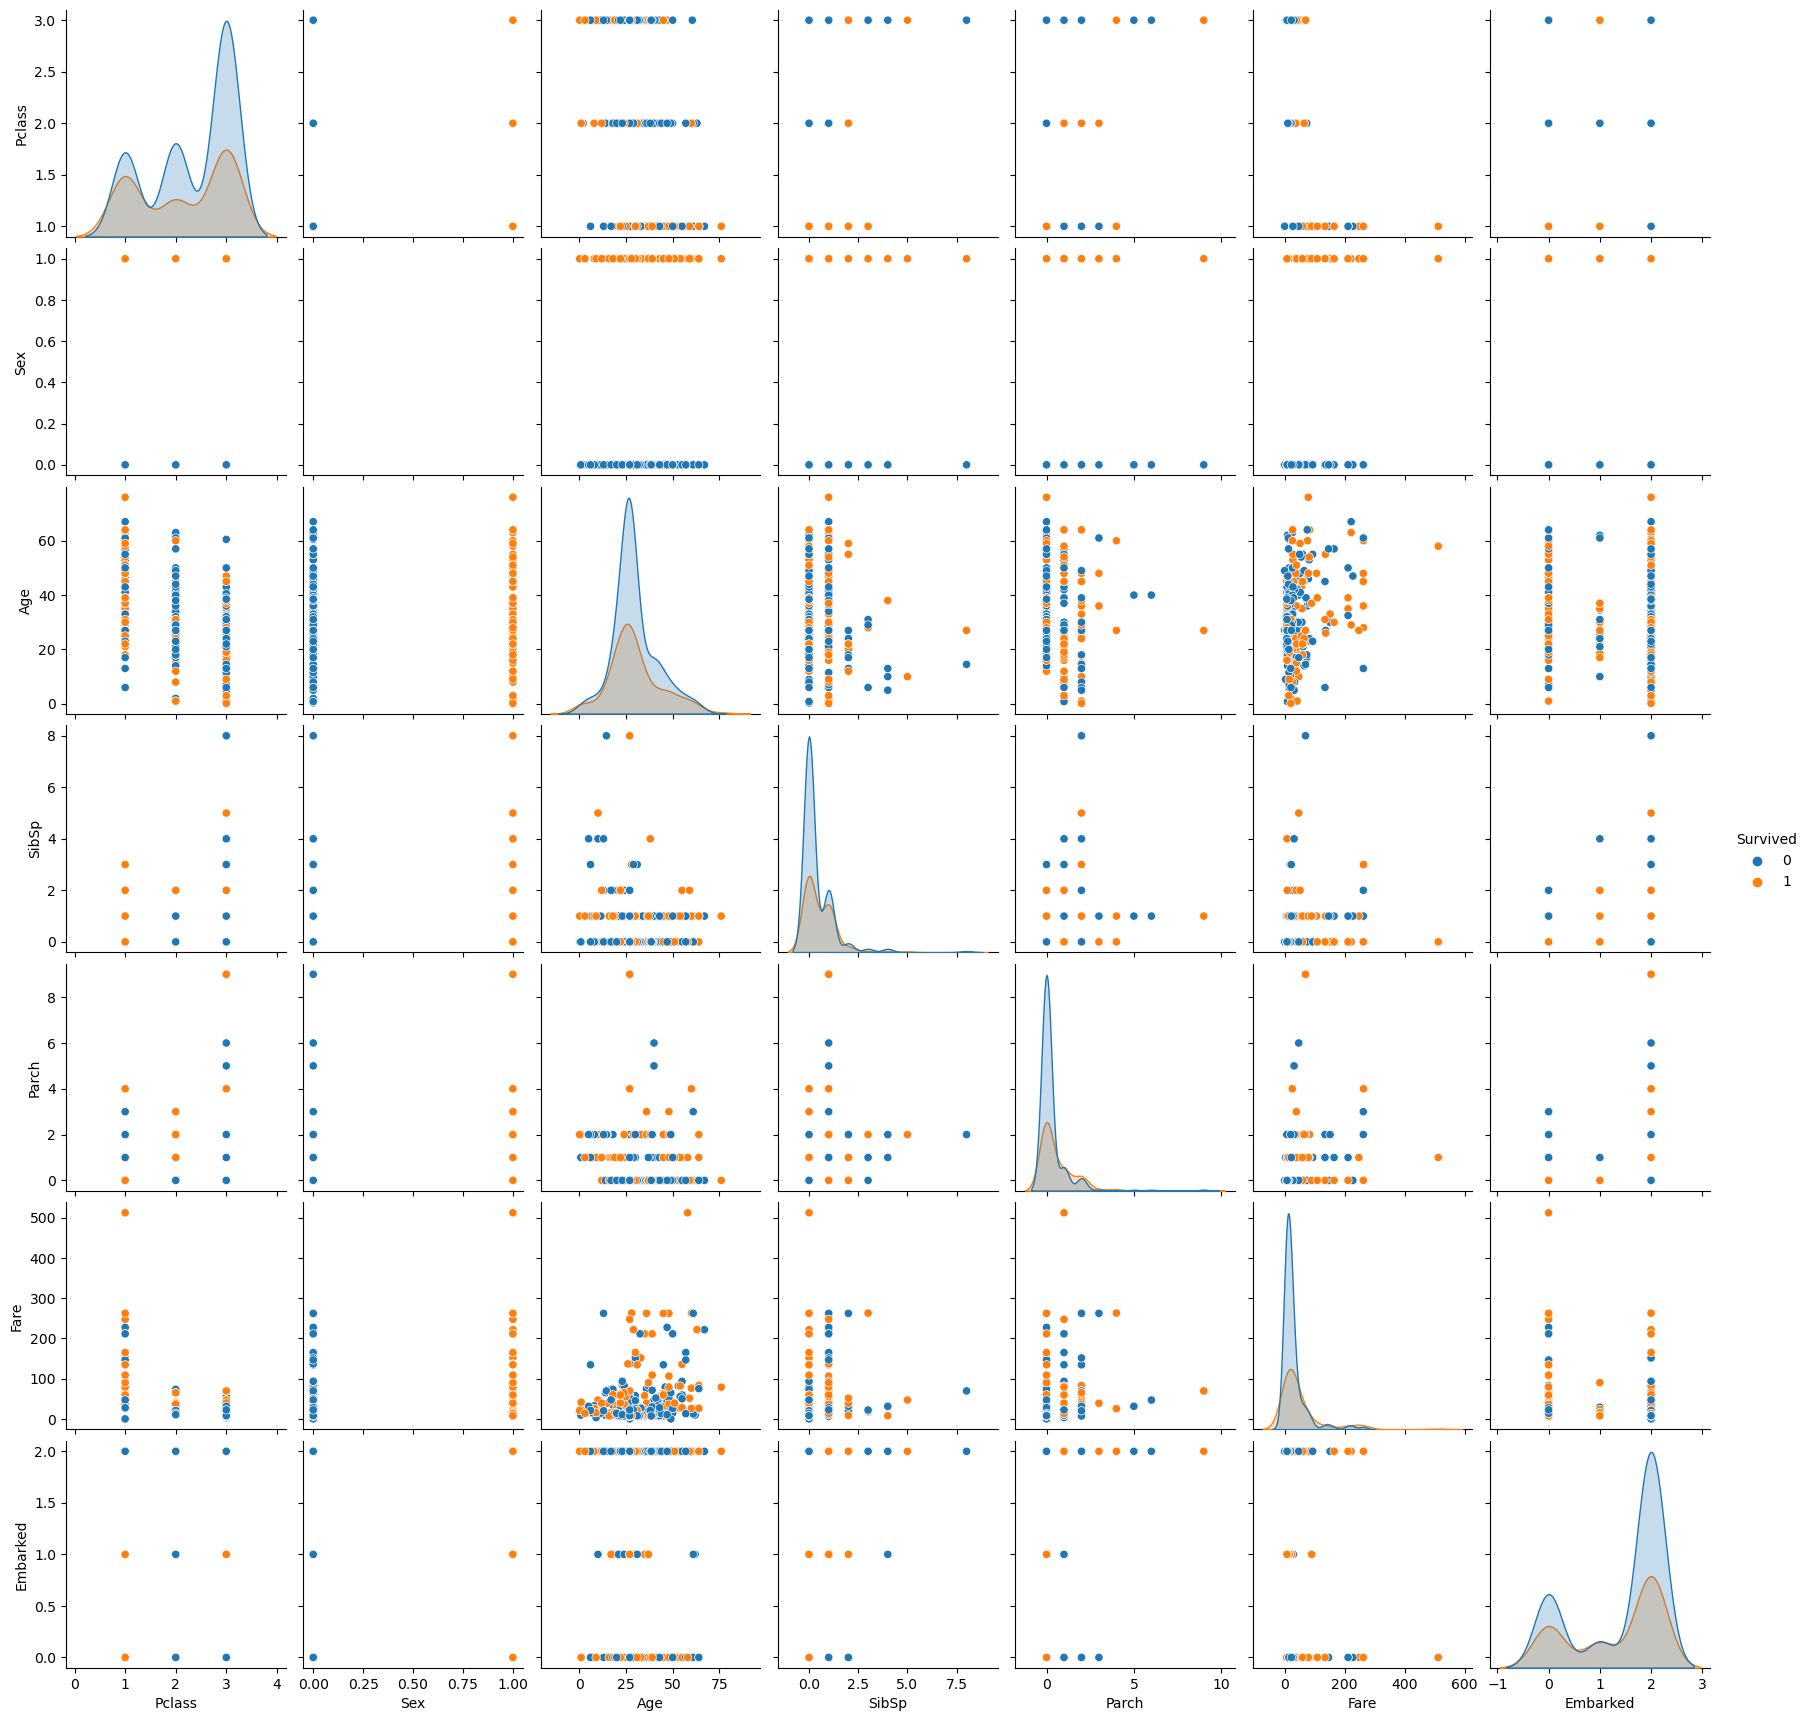

In [13]:
sns.pairplot(df, hue='Survived')
plt.show()

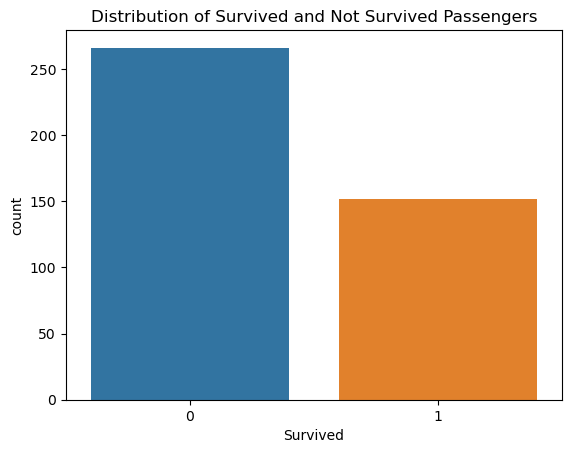

In [34]:
sns.countplot(data=df, x='Survived')
plt.title('Distribution of Survived and Not Survived Passengers')
plt.show()

In [14]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [15]:
numeric_features = ['Age', 'Fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

## One-hot Encoding

In [16]:
categorical_features = ['Sex', 'Embarked']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [17]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

## Model Building 

In [18]:
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=200, random_state=42)
}

#### Prediction and Evaluation

In [23]:
accuracies = {}
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy
    
    print(f"Model: {name}")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\n")

Model: Random Forest
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

Confusion Matrix:
 [[50  0]
 [ 0 34]]


Model: KNN
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

Confusion Matrix:
 [[50  0]
 [ 0 34]]


Model: Logistic Regression
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00     

In [24]:
print("Accuracies of all Models:")
for name, accuracy in accuracies.items():
    print(f"{name}: {accuracy}")

Accuracies of all Models:
Random Forest: 1.0
KNN: 1.0
Logistic Regression: 1.0


## Cross-validation

In [29]:
cv_accuracies = {}
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('scaler', StandardScaler()),  # Scale features
        ('classifier', model)
    ])

In [32]:
cv_scores = cross_val_score(pipeline, X, y, cv=5)
cv_accuracies[name] = cv_scores.mean()
    
print(f"Model: {name}")
print(f"Cross-Validation Accuracies: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean()}\n")


Model: Logistic Regression
Cross-Validation Accuracies: [1. 1. 1. 1. 1.]
Mean Cross-Validation Accuracy: 1.0



In [33]:
print("Accuracies of all Models after Cross-Validation:")
for name, mean_accuracy in cv_accuracies.items():
    print(f"{name}: {mean_accuracy}")

Accuracies of all Models after Cross-Validation:
Logistic Regression: 1.0
